<a href="https://colab.research.google.com/github/MaCavalca/Pre_processamento_Pyspark/blob/main/pre_process_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pré-processamento de dados usando

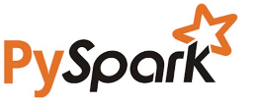

O PySpark é uma estrutura de processamento de dados de código aberto construída sobre o Apache Spark, projetada para processamento de big data, sendo que:

- Suporta computação distribuída, processamento de dados em memória, tolerância a falhas e escalabilidade, e vem com bibliotecas para processamento de dados, como Spark SQL, Spark Streaming, MLlib e GraphX. 

- Consegue lidar com grandes conjuntos de dados em vários formatos e é adequado para processamento de dados em lote e em tempo real, tornando-o amplamente utilizado nos setores de finanças, saúde, varejo e comércio eletrônico para várias tarefas. 

- Sua facilidade de uso e escalabilidade o tornam uma escolha popular entre cientistas e engenheiros de dados que trabalham em projetos de big data.



### Construção de uma tabela única



  Inicialmente temos 3 arquivos de diferentes tipos (.csv, .parquet e .json) com dados cadastrais de pessoas físicas. Como esses dados vieram de bancos de dados diferentes, provavelmente, possuem algumas diferenças entre si.

  Para fazer as transformações necessárias nesses dados de diferentes formatos utilizaremos DataFrame API pyspark.

  Criaremos um script no Spark que vai ler os 3 arquivos, aplicar várias transformações para manter integridade nos dados, e no final apresentará as
colunas em comum dos 3 arquivos contendo todos os cadastro íntegros e tratados.

  Cuidados a serem observados:

- Atenção com a tipagem das colunas.
- Atenção com padronização do domínio de cada campo.
- Em caso de cpfs repetidos entre as tabelas, trazer o cadastro mais recente para a tabela final. 


###Instalando o pyspark

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=242eeb3ebd9e296933717692d37408bd56b6b74592469c931c3c49605009a0ec
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


###Mapeando o Google Drive para possibilitar o acesso aos arquivos de leitura

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Etapas obrigatórias no pré-processamento de dados com Spark

Etapa 1: Importar a SparkSession para iniciar a sessão PySpark

In [3]:
from pyspark.sql import SparkSession

Etapa 2: Utilizar a função getOrCreate() para criar a sessão do Apache Spark

In [4]:
spark = SparkSession \
    .builder \
    .appName("Pré-processamento de dados com Spark!") \
    .config('spark.ui.port', '4050') \
    .getOrCreate()

Etapa 3: Verificar se o objeto spark contém em um formato graphical

In [5]:
spark

###Lendo os 3 arquivos de diferentes formatos

In [6]:
df_csv = spark.read.csv("dados_cadastro_2.csv", sep="|", header=True)

df_parque = spark.read.parquet("dados_cadastro_1.parquet")

df_json = spark.read.json("dados_cadastro_3.json")


### Apresentando os dados dos arquivos e seus tipos

In [7]:
df_csv.show(truncate=False)

+-----------+----------------------+---------------+----+--------+--------------------------+------+-----------------------------+--------------------+------+-------------------+-------------+
|cpf        |nome                  |data_nascimento|sexo|convenio|logradouro                |numero|bairro                       |cidade              |estado|data_cadastro      |pais_cadastro|
+-----------+----------------------+---------------+----+--------+--------------------------+------+-----------------------------+--------------------+------+-------------------+-------------+
|03687145271|Maria Cecília Duarte  |02/11/1989     |Fem |AMIL    |Jardim Rodrigues          |335.0 |São Geraldo                  |Gonçalves           |CE    |1970-07-28 10:05:02|Br           |
|40791586375|Maria Cecília Alves   |10/05/1980     |Fem |AMIL    |Viela de Ribeiro          |651.0 |Goiania                      |Rezende da Praia    |AP    |1992-03-12 07:10:16|Br           |
|52983647056|Laura Cardoso         

In [8]:
df_csv.printSchema()

root
 |-- cpf: string (nullable = true)
 |-- nome: string (nullable = true)
 |-- data_nascimento: string (nullable = true)
 |-- sexo: string (nullable = true)
 |-- convenio: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- numero: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- cidade: string (nullable = true)
 |-- estado: string (nullable = true)
 |-- data_cadastro: string (nullable = true)
 |-- pais_cadastro: string (nullable = true)



In [9]:
df_parque.show(truncate=False)

+--------------+------------------------+---------------+----+------------+------------------------+------+-----------------------+---------------------+------+-------------------+---+-----------------+
|documento_cpf |nome_completo           |data_nascimento|sexo|convenio    |logradouro              |numero|bairro                 |cidade               |pais  |data_cadastro      |uf |__index_level_0__|
+--------------+------------------------+---------------+----+------------+------------------------+------+-----------------------+---------------------+------+-------------------+---+-----------------+
|390.628.415-89|Caroline Rocha          |1982-02-28     |Fem |GoodHealth  |Trevo Santos            |773   |Vila Antena            |Cardoso              |Brasil|1979-10-19T08:09:16|AC |207979           |
|360.847.952-00|Dr. Luiz Otávio Monteiro|2020-09-04     |Masc|Porto Seguro|Trevo Mariana Alves     |184   |Marmiteiros            |Gonçalves            |Brasil|2012-01-22T00:21:53|AC |5181

In [10]:
df_parque.printSchema()

root
 |-- documento_cpf: string (nullable = true)
 |-- nome_completo: string (nullable = true)
 |-- data_nascimento: string (nullable = true)
 |-- sexo: string (nullable = true)
 |-- convenio: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- numero: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- cidade: string (nullable = true)
 |-- pais: string (nullable = true)
 |-- data_cadastro: string (nullable = true)
 |-- uf: string (nullable = true)
 |-- __index_level_0__: long (nullable = true)



In [11]:
df_json.show(truncate=False)

+-----------------------------+-------------------+--------+--------------+-------------+------------------+------------------+-------------------------------+-----------------------+------+----+----+
|bairro                       |cidade             |convenio|cpf           |data_cadastro|data_nascimento   |estado            |logradouro                     |nome                   |numero|pais|sexo|
+-----------------------------+-------------------+--------+--------------+-------------+------------------+------------------+-------------------------------+-----------------------+------+----+----+
|Vila Madre Gertrudes 3ª Seção|Ribeiro Grande     |AMIL    |573.691.208-21|817032248000 |August 26, 2017   |Amapá             |Largo de Viana                 |Ryan Santos            |886   |    |M   |
|Havaí                        |Caldeira das Flores|AMIL    |520.936.741-06|1009317437000|January 30, 2023  |Mato Grosso do Sul|Rodovia Nina Alves             |Juliana Correia        |545   |    |F

In [12]:
df_json.printSchema()

root
 |-- bairro: string (nullable = true)
 |-- cidade: string (nullable = true)
 |-- convenio: string (nullable = true)
 |-- cpf: string (nullable = true)
 |-- data_cadastro: long (nullable = true)
 |-- data_nascimento: string (nullable = true)
 |-- estado: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- nome: string (nullable = true)
 |-- numero: long (nullable = true)
 |-- pais: string (nullable = true)
 |-- sexo: string (nullable = true)



- Analisando cada dataframe vemos várias inconsistências relacionadas tanto a formatação dos dados (por exemplo, a coluna 'cpf' possui dois formatos xxxxxxxxxxx e xxx.xxx.xxx-xx) quanto no tipo do dado (por exemplo, a coluna'data_cadastro' aparece como 'string' e 'long' mas não como date)

- Os nomes e a ordem das colunas em cada dataframe também é diferente, sendo que, o dataframe df_parque apresenta uma coluna a mais '__index_level_0__'

- Como iremos usar o 'cpf' para ser o nosso índice em todos os dataframes vamos começar com a sua padronização para xxxxxxxxxxx no df_parque e df_json.

###Importando as bibliotecas

In [13]:
from pyspark.sql.functions import *
from pyspark.sql.types import *


### Formatação da coluna 'cpf' nos dataframes df_parque e df_json

In [14]:
df_parque = df_parque.withColumn('documento_cpf', regexp_replace('documento_cpf', '[^0-9]', ''))
df_parque.show()

+-------------+--------------------+---------------+----+------------+--------------------+------+--------------------+--------------------+------+-------------------+---+-----------------+
|documento_cpf|       nome_completo|data_nascimento|sexo|    convenio|          logradouro|numero|              bairro|              cidade|  pais|      data_cadastro| uf|__index_level_0__|
+-------------+--------------------+---------------+----+------------+--------------------+------+--------------------+--------------------+------+-------------------+---+-----------------+
|  39062841589|      Caroline Rocha|     1982-02-28| Fem|  GoodHealth|        Trevo Santos|   773|         Vila Antena|             Cardoso|Brasil|1979-10-19T08:09:16| AC|           207979|
|  36084795200|Dr. Luiz Otávio M...|     2020-09-04|Masc|Porto Seguro| Trevo Mariana Alves|   184|         Marmiteiros|           Gonçalves|Brasil|2012-01-22T00:21:53| AC|           518164|
|  41593207670|Srta. Emanuelly C...|     2011-10-2

In [15]:
df_json = df_json.withColumn('cpf', regexp_replace('cpf', '[^0-9]', ''))
df_json.show()

+--------------------+-------------------+--------+-----------+-------------+------------------+------------------+--------------------+--------------------+------+----+----+
|              bairro|             cidade|convenio|        cpf|data_cadastro|   data_nascimento|            estado|          logradouro|                nome|numero|pais|sexo|
+--------------------+-------------------+--------+-----------+-------------+------------------+------------------+--------------------+--------------------+------+----+----+
|Vila Madre Gertru...|     Ribeiro Grande|    AMIL|57369120821| 817032248000|   August 26, 2017|             Amapá|      Largo de Viana|         Ryan Santos|   886|    |   M|
|               Havaí|Caldeira das Flores|    AMIL|52093674106|1009317437000|  January 30, 2023|Mato Grosso do Sul|  Rodovia Nina Alves|     Juliana Correia|   545|    |   F|
|            Caiçaras|            Barbosa|    AMIL|01269843524| 511111127000|  January 06, 1979|         São Paulo|         R

###Renomeando as Colunas nos dataframes

Para trabalharmos com todo o conjunto de dados de maneira consistente vamos padronizar a ordem e os nomes das colunas nos dataframes df_csv, df_parque e df_json para:

 ['cpf',
 'nome_completo',
 'data_nascimento',
 'sexo',
 'convenio',
 'logradouro',
 'numero',
 'bairro',
 'cidade',
 'estado',
 'timestamp',
 'pais']

 A coluna data_cadastro foi renomeada para timestamp que é o que ela representa.

In [16]:
#exibindo as colunas dentro do DataFrame df_csv
df_csv.columns

['cpf',
 'nome',
 'data_nascimento',
 'sexo',
 'convenio',
 'logradouro',
 'numero',
 'bairro',
 'cidade',
 'estado',
 'data_cadastro',
 'pais_cadastro']

In [17]:
#lista criada a partir das colunas do df_csv, no intuito de alterar vários nomes de uma só vez
cols = ['cpf',
 'nome_completo',
 'data_nascimento',
 'sexo',
 'convenio',
 'logradouro',
 'numero',
 'bairro',
 'cidade',
 'estado',
 'timestamp',
 'pais']

#criando um novo DataFrame com as colunas renomeadas
df_csv_renamed = df_csv.toDF(*cols)

In [18]:
#exibindo as colunas dentro do DataFrame df_parque
df_parque.columns

['documento_cpf',
 'nome_completo',
 'data_nascimento',
 'sexo',
 'convenio',
 'logradouro',
 'numero',
 'bairro',
 'cidade',
 'pais',
 'data_cadastro',
 'uf',
 '__index_level_0__']

In [19]:
#lista criada a partir das colunas do df_parquet, no intuito de alterar vários nomes de uma só vez 
cols = ['cpf',
 'nome_completo',
 'data_nascimento',
 'sexo',
 'convenio',
 'logradouro',
 'numero',
 'bairro',
 'cidade',
 'pais',
 'timestamp',
 'estado',
 '__index_level_0__']

#criando um novo DataFrame com as colunas renomeadas.
df_parque_renamed = df_parque.toDF(*cols)

In [20]:
#exibindo as colunas dentro do DataFrame df_json
df_json.columns

['bairro',
 'cidade',
 'convenio',
 'cpf',
 'data_cadastro',
 'data_nascimento',
 'estado',
 'logradouro',
 'nome',
 'numero',
 'pais',
 'sexo']

In [21]:
#lista criada a partir das colunas do df_json, no intuito de alterar vários nomes de uma só vez 
cols = ['bairro',
 'cidade',
 'convenio',
 'cpf',
 'timestamp',
 'data_nascimento',
 'estado',
 'logradouro',
 'nome_completo',
 'numero',
 'pais',
 'sexo']

#criando um novo DataFrame com as colunas renomeadas.
df_json_renamed = df_json.toDF(*cols)

### Ordenando todas as colunas dos dataframes

In [22]:
#ordenando o df_csv

df_csv_order = df_csv_renamed[['cpf',
 'nome_completo',
 'data_nascimento',
 'sexo',
 'convenio',
 'logradouro',
 'numero',
 'bairro',
 'cidade',
 'estado',
 'pais',
 'timestamp'    
]]


In [23]:
df_csv_order.show()

+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+--------------------+------+----+-------------------+
|        cpf|       nome_completo|data_nascimento|sexo|convenio|          logradouro|numero|              bairro|              cidade|estado|pais|          timestamp|
+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+--------------------+------+----+-------------------+
|03687145271|Maria Cecília Duarte|     02/11/1989| Fem|    AMIL|    Jardim Rodrigues| 335.0|         São Geraldo|           Gonçalves|    CE|  Br|1970-07-28 10:05:02|
|40791586375| Maria Cecília Alves|     10/05/1980| Fem|    AMIL|    Viela de Ribeiro| 651.0|             Goiania|    Rezende da Praia|    AP|  Br|1992-03-12 07:10:16|
|52983647056|       Laura Cardoso|     02/09/1997| Fem|    AMIL|Pátio Brenda Ribeiro|  64.0|             Acaiaca|       Campos Grande|    PR|  Br|1977-01-03 07:55:38

Antes de ordenar o dataframe df_parque vamos apagar a coluna index

In [24]:
df_parque_renamed.drop("__index_level_0__")

DataFrame[cpf: string, nome_completo: string, data_nascimento: string, sexo: string, convenio: string, logradouro: string, numero: string, bairro: string, cidade: string, pais: string, timestamp: string, estado: string]

In [25]:
#ordenando o df_parque

df_parque_order = df_parque_renamed[['cpf',
 'nome_completo',
 'data_nascimento',
 'sexo',
 'convenio',
 'logradouro',
 'numero',
 'bairro',
 'cidade',
 'estado',
 'pais',
 'timestamp'    
]]

In [26]:
df_parque_order.show()

+-----------+--------------------+---------------+----+------------+--------------------+------+--------------------+--------------------+------+------+-------------------+
|        cpf|       nome_completo|data_nascimento|sexo|    convenio|          logradouro|numero|              bairro|              cidade|estado|  pais|          timestamp|
+-----------+--------------------+---------------+----+------------+--------------------+------+--------------------+--------------------+------+------+-------------------+
|39062841589|      Caroline Rocha|     1982-02-28| Fem|  GoodHealth|        Trevo Santos|   773|         Vila Antena|             Cardoso|    AC|Brasil|1979-10-19T08:09:16|
|36084795200|Dr. Luiz Otávio M...|     2020-09-04|Masc|Porto Seguro| Trevo Mariana Alves|   184|         Marmiteiros|           Gonçalves|    AC|Brasil|2012-01-22T00:21:53|
|41593207670|Srta. Emanuelly C...|     2011-10-28| Fem|       Prata|  Residencial Mendes|   449|            Vila Puc|               Pin

In [27]:
#ordenando o df_json

df_json_order = df_json_renamed[['cpf',
 'nome_completo',
 'data_nascimento',
 'sexo',
 'convenio',
 'logradouro',
 'numero',
 'bairro',
 'cidade',
 'estado',
 'pais',
 'timestamp'    
]]

In [28]:
df_json_order.show()

+-----------+--------------------+------------------+----+--------+--------------------+------+--------------------+-------------------+------------------+----+-------------+
|        cpf|       nome_completo|   data_nascimento|sexo|convenio|          logradouro|numero|              bairro|             cidade|            estado|pais|    timestamp|
+-----------+--------------------+------------------+----+--------+--------------------+------+--------------------+-------------------+------------------+----+-------------+
|57369120821|         Ryan Santos|   August 26, 2017|   M|    AMIL|      Largo de Viana|   886|Vila Madre Gertru...|     Ribeiro Grande|             Amapá|    | 817032248000|
|52093674106|     Juliana Correia|  January 30, 2023|   F|    AMIL|  Rodovia Nina Alves|   545|               Havaí|Caldeira das Flores|Mato Grosso do Sul|    |1009317437000|
|01269843524|   Juliana Rodrigues|  January 06, 1979|   F|    AMIL|         Rua Peixoto|   728|            Caiçaras|         

***Observações***

  Agora podemos avaliar de forma mais clara os dados de cada dataframe e realizar as transformações necessárias.

  Após algumas avaliações, a metodologia que será adotada para a transformação dos dados consistiu em tratar cada dataframe separadamente, e somente após a padronização dos dados e de seus tipos, que será realizada a união dos dataframes e os ajustes finais. 
  - Um dos motivos ao adotar essa metodologia foi para ter mais rapidez de processamento, visto que, os dataframes df_csv, df_parque e df_json possuem respectivamente, 952875, 952613, 952210, linhas cada um, que somados geram 2.857.698 de linhas.
  - Outro motivo foi a diferença entre os tipos de dados e formatações para uma mesma coluna em diferentes dataframes

Iremos iniciar com as transformações no df_csv_order, após df_parque_order e por último no df_json_order.

### Transformações do df_csv_order


- Trocando os valores da coluna sexo: <br>
Fem -> F<br>
Masc -> M

In [29]:
df_csv_order = df_csv_order.withColumn('sexo', when(df_csv_order.sexo == 'Masc', 'M') \
      .when(df_csv_order.sexo == 'Fem','F') \
      .otherwise(df_csv_order.sexo))
df_csv_order.show()

+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+--------------------+------+----+-------------------+
|        cpf|       nome_completo|data_nascimento|sexo|convenio|          logradouro|numero|              bairro|              cidade|estado|pais|          timestamp|
+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+--------------------+------+----+-------------------+
|03687145271|Maria Cecília Duarte|     02/11/1989|   F|    AMIL|    Jardim Rodrigues| 335.0|         São Geraldo|           Gonçalves|    CE|  Br|1970-07-28 10:05:02|
|40791586375| Maria Cecília Alves|     10/05/1980|   F|    AMIL|    Viela de Ribeiro| 651.0|             Goiania|    Rezende da Praia|    AP|  Br|1992-03-12 07:10:16|
|52983647056|       Laura Cardoso|     02/09/1997|   F|    AMIL|Pátio Brenda Ribeiro|  64.0|             Acaiaca|       Campos Grande|    PR|  Br|1977-01-03 07:55:38

- Separando os nomes dos convênios Good Health e Saude Mais 

In [30]:
df_csv_order = df_csv_order.withColumn('convenio', when(df_csv_order.convenio == 'GoodHealth', 'Good Health') \
      .when(df_csv_order.convenio == 'SaudeMais','Saude Mais') \
      .otherwise(df_csv_order.convenio))
df_csv_order.show()

+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+--------------------+------+----+-------------------+
|        cpf|       nome_completo|data_nascimento|sexo|convenio|          logradouro|numero|              bairro|              cidade|estado|pais|          timestamp|
+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+--------------------+------+----+-------------------+
|03687145271|Maria Cecília Duarte|     02/11/1989|   F|    AMIL|    Jardim Rodrigues| 335.0|         São Geraldo|           Gonçalves|    CE|  Br|1970-07-28 10:05:02|
|40791586375| Maria Cecília Alves|     10/05/1980|   F|    AMIL|    Viela de Ribeiro| 651.0|             Goiania|    Rezende da Praia|    AP|  Br|1992-03-12 07:10:16|
|52983647056|       Laura Cardoso|     02/09/1997|   F|    AMIL|Pátio Brenda Ribeiro|  64.0|             Acaiaca|       Campos Grande|    PR|  Br|1977-01-03 07:55:38

- A coluna data_nascimento tem vários problemas que temos que solucionar:

 - Trocar a '/' por '-' 
 - Colocar no formato padrão de date 'yyyy-mm-dd', pois que está no formato 'dd/mm/yyyy'
 - Mudar para o formato data (obs. ocorreram muitos erros syntaxe e somente com a forma abaixo deu certo para  a extensão csv)

In [31]:
df_csv_order = df_csv_order.withColumn('data_nascimento', regexp_replace('data_nascimento', '/', '-'))

In [32]:
df_csv_order.show()

+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+--------------------+------+----+-------------------+
|        cpf|       nome_completo|data_nascimento|sexo|convenio|          logradouro|numero|              bairro|              cidade|estado|pais|          timestamp|
+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+--------------------+------+----+-------------------+
|03687145271|Maria Cecília Duarte|     02-11-1989|   F|    AMIL|    Jardim Rodrigues| 335.0|         São Geraldo|           Gonçalves|    CE|  Br|1970-07-28 10:05:02|
|40791586375| Maria Cecília Alves|     10-05-1980|   F|    AMIL|    Viela de Ribeiro| 651.0|             Goiania|    Rezende da Praia|    AP|  Br|1992-03-12 07:10:16|
|52983647056|       Laura Cardoso|     02-09-1997|   F|    AMIL|Pátio Brenda Ribeiro|  64.0|             Acaiaca|       Campos Grande|    PR|  Br|1977-01-03 07:55:38

In [33]:
# Mudando de dd-mm-yyyy para yyyy-mm-dd

df_csv_order = df_csv_order.withColumn("data_nascimento", date_format(unix_timestamp(df_csv_order.data_nascimento , "dd-mm-yyyy").cast("timestamp"),"yyyy-mm-dd"))


In [34]:
df_csv_order.show()

+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+--------------------+------+----+-------------------+
|        cpf|       nome_completo|data_nascimento|sexo|convenio|          logradouro|numero|              bairro|              cidade|estado|pais|          timestamp|
+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+--------------------+------+----+-------------------+
|03687145271|Maria Cecília Duarte|     1989-11-02|   F|    AMIL|    Jardim Rodrigues| 335.0|         São Geraldo|           Gonçalves|    CE|  Br|1970-07-28 10:05:02|
|40791586375| Maria Cecília Alves|     1980-05-10|   F|    AMIL|    Viela de Ribeiro| 651.0|             Goiania|    Rezende da Praia|    AP|  Br|1992-03-12 07:10:16|
|52983647056|       Laura Cardoso|     1997-09-02|   F|    AMIL|Pátio Brenda Ribeiro|  64.0|             Acaiaca|       Campos Grande|    PR|  Br|1977-01-03 07:55:38

In [35]:
df_csv_order.printSchema()

root
 |-- cpf: string (nullable = true)
 |-- nome_completo: string (nullable = true)
 |-- data_nascimento: string (nullable = true)
 |-- sexo: string (nullable = true)
 |-- convenio: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- numero: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- cidade: string (nullable = true)
 |-- estado: string (nullable = true)
 |-- pais: string (nullable = true)
 |-- timestamp: string (nullable = true)



In [36]:
# Alterando o tipo da coluna para date
df_csv_order = df_csv_order.withColumn('data_nascimento', df_csv_order.data_nascimento.cast('date'))

In [37]:
df_csv_order.show()

+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+--------------------+------+----+-------------------+
|        cpf|       nome_completo|data_nascimento|sexo|convenio|          logradouro|numero|              bairro|              cidade|estado|pais|          timestamp|
+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+--------------------+------+----+-------------------+
|03687145271|Maria Cecília Duarte|     1989-11-02|   F|    AMIL|    Jardim Rodrigues| 335.0|         São Geraldo|           Gonçalves|    CE|  Br|1970-07-28 10:05:02|
|40791586375| Maria Cecília Alves|     1980-05-10|   F|    AMIL|    Viela de Ribeiro| 651.0|             Goiania|    Rezende da Praia|    AP|  Br|1992-03-12 07:10:16|
|52983647056|       Laura Cardoso|     1997-09-02|   F|    AMIL|Pátio Brenda Ribeiro|  64.0|             Acaiaca|       Campos Grande|    PR|  Br|1977-01-03 07:55:38

In [38]:
df_csv_order.printSchema()

root
 |-- cpf: string (nullable = true)
 |-- nome_completo: string (nullable = true)
 |-- data_nascimento: date (nullable = true)
 |-- sexo: string (nullable = true)
 |-- convenio: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- numero: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- cidade: string (nullable = true)
 |-- estado: string (nullable = true)
 |-- pais: string (nullable = true)
 |-- timestamp: string (nullable = true)



- Trocando os valores da coluna pais: 
Br -> Brasil

In [39]:
df_csv_order = df_csv_order.withColumn('pais', regexp_replace('pais', 'Br', 'Brasil'))
df_csv_order.show(truncate=False)

+-----------+----------------------+---------------+----+--------+--------------------------+------+-----------------------------+--------------------+------+------+-------------------+
|cpf        |nome_completo         |data_nascimento|sexo|convenio|logradouro                |numero|bairro                       |cidade              |estado|pais  |timestamp          |
+-----------+----------------------+---------------+----+--------+--------------------------+------+-----------------------------+--------------------+------+------+-------------------+
|03687145271|Maria Cecília Duarte  |1989-11-02     |F   |AMIL    |Jardim Rodrigues          |335.0 |São Geraldo                  |Gonçalves           |CE    |Brasil|1970-07-28 10:05:02|
|40791586375|Maria Cecília Alves   |1980-05-10     |F   |AMIL    |Viela de Ribeiro          |651.0 |Goiania                      |Rezende da Praia    |AP    |Brasil|1992-03-12 07:10:16|
|52983647056|Laura Cardoso         |1997-09-02     |F   |AMIL    |Páti

- Separando a data do horário pelo espaço na coluna 'timestamp' e criar a coluna 'data_cadastro'


In [40]:
df_csv_order = df_csv_order.withColumn('data_cadastro', col('timestamp').cast('date'))

In [41]:
df_csv_order.show(truncate=False)

+-----------+----------------------+---------------+----+--------+--------------------------+------+-----------------------------+--------------------+------+------+-------------------+-------------+
|cpf        |nome_completo         |data_nascimento|sexo|convenio|logradouro                |numero|bairro                       |cidade              |estado|pais  |timestamp          |data_cadastro|
+-----------+----------------------+---------------+----+--------+--------------------------+------+-----------------------------+--------------------+------+------+-------------------+-------------+
|03687145271|Maria Cecília Duarte  |1989-11-02     |F   |AMIL    |Jardim Rodrigues          |335.0 |São Geraldo                  |Gonçalves           |CE    |Brasil|1970-07-28 10:05:02|1970-07-28   |
|40791586375|Maria Cecília Alves   |1980-05-10     |F   |AMIL    |Viela de Ribeiro          |651.0 |Goiania                      |Rezende da Praia    |AP    |Brasil|1992-03-12 07:10:16|1992-03-12   |


- Modificando o tipo da coluna 'numero' de String para IntegerType

In [42]:
df_csv_order = df_csv_order.withColumn('numero', df_csv_order.numero.cast(IntegerType()))

In [43]:
df_csv_order.printSchema()

root
 |-- cpf: string (nullable = true)
 |-- nome_completo: string (nullable = true)
 |-- data_nascimento: date (nullable = true)
 |-- sexo: string (nullable = true)
 |-- convenio: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- numero: integer (nullable = true)
 |-- bairro: string (nullable = true)
 |-- cidade: string (nullable = true)
 |-- estado: string (nullable = true)
 |-- pais: string (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- data_cadastro: date (nullable = true)



O dataframe df_csv_order está ok, por enquanto, talvez mais tarde iremos a pagar a coluna timestamp.

### Transformações do df_parque


- Trocando os valores da coluna sexo: <br>
Fem -> F<br>
Masc -> M

In [44]:
df_parque_order = df_parque_order.withColumn('sexo', when(df_parque_order.sexo == 'Masc', 'M') \
      .when(df_parque_order.sexo == 'Fem','F') \
      .otherwise(df_parque_order.sexo))

df_parque_order.show()

+-----------+--------------------+---------------+----+------------+--------------------+------+--------------------+--------------------+------+------+-------------------+
|        cpf|       nome_completo|data_nascimento|sexo|    convenio|          logradouro|numero|              bairro|              cidade|estado|  pais|          timestamp|
+-----------+--------------------+---------------+----+------------+--------------------+------+--------------------+--------------------+------+------+-------------------+
|39062841589|      Caroline Rocha|     1982-02-28|   F|  GoodHealth|        Trevo Santos|   773|         Vila Antena|             Cardoso|    AC|Brasil|1979-10-19T08:09:16|
|36084795200|Dr. Luiz Otávio M...|     2020-09-04|   M|Porto Seguro| Trevo Mariana Alves|   184|         Marmiteiros|           Gonçalves|    AC|Brasil|2012-01-22T00:21:53|
|41593207670|Srta. Emanuelly C...|     2011-10-28|   F|       Prata|  Residencial Mendes|   449|            Vila Puc|               Pin

- Separando os nomes dos convênios Good Health e Saude Mais 

In [45]:
df_parque_order = df_parque_order.withColumn('convenio', when(df_parque_order.convenio == 'GoodHealth', 'Good Health') \
      .when(df_parque_order.convenio == 'SaudeMais','Saude Mais') \
      .otherwise(df_parque_order.convenio))

df_parque_order.show()

+-----------+--------------------+---------------+----+------------+--------------------+------+--------------------+--------------------+------+------+-------------------+
|        cpf|       nome_completo|data_nascimento|sexo|    convenio|          logradouro|numero|              bairro|              cidade|estado|  pais|          timestamp|
+-----------+--------------------+---------------+----+------------+--------------------+------+--------------------+--------------------+------+------+-------------------+
|39062841589|      Caroline Rocha|     1982-02-28|   F| Good Health|        Trevo Santos|   773|         Vila Antena|             Cardoso|    AC|Brasil|1979-10-19T08:09:16|
|36084795200|Dr. Luiz Otávio M...|     2020-09-04|   M|Porto Seguro| Trevo Mariana Alves|   184|         Marmiteiros|           Gonçalves|    AC|Brasil|2012-01-22T00:21:53|
|41593207670|Srta. Emanuelly C...|     2011-10-28|   F|       Prata|  Residencial Mendes|   449|            Vila Puc|               Pin

- Separando a data do horário pelo espaço na coluna 'timestamp' e criar a coluna 'data_cadastro'

In [46]:
df_parque_order = df_parque_order.withColumn('data_cadastro', col('timestamp').cast('date'))

df_parque_order.show()

+-----------+--------------------+---------------+----+------------+--------------------+------+--------------------+--------------------+------+------+-------------------+-------------+
|        cpf|       nome_completo|data_nascimento|sexo|    convenio|          logradouro|numero|              bairro|              cidade|estado|  pais|          timestamp|data_cadastro|
+-----------+--------------------+---------------+----+------------+--------------------+------+--------------------+--------------------+------+------+-------------------+-------------+
|39062841589|      Caroline Rocha|     1982-02-28|   F| Good Health|        Trevo Santos|   773|         Vila Antena|             Cardoso|    AC|Brasil|1979-10-19T08:09:16|   1979-10-19|
|36084795200|Dr. Luiz Otávio M...|     2020-09-04|   M|Porto Seguro| Trevo Mariana Alves|   184|         Marmiteiros|           Gonçalves|    AC|Brasil|2012-01-22T00:21:53|   2012-01-22|
|41593207670|Srta. Emanuelly C...|     2011-10-28|   F|       Pra

- Modificando o tipo da coluna 'numero' de String para IntegerType

In [47]:
df_parque_order = df_parque_order.withColumn('numero', df_parque_order.numero.cast(IntegerType()))

- Modificando o tipo da coluna data_nascimento de String para date

In [ ]:
df_parque_order = df_parque_order.withColumn('data_nascimento', df_parque_order.data_nascimento.cast(DateType()))

In [48]:
df_parque_order.printSchema()

root
 |-- cpf: string (nullable = true)
 |-- nome_completo: string (nullable = true)
 |-- data_nascimento: string (nullable = true)
 |-- sexo: string (nullable = true)
 |-- convenio: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- numero: integer (nullable = true)
 |-- bairro: string (nullable = true)
 |-- cidade: string (nullable = true)
 |-- estado: string (nullable = true)
 |-- pais: string (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- data_cadastro: date (nullable = true)



In [49]:
df_parque_order.show()

+-----------+--------------------+---------------+----+------------+--------------------+------+--------------------+--------------------+------+------+-------------------+-------------+
|        cpf|       nome_completo|data_nascimento|sexo|    convenio|          logradouro|numero|              bairro|              cidade|estado|  pais|          timestamp|data_cadastro|
+-----------+--------------------+---------------+----+------------+--------------------+------+--------------------+--------------------+------+------+-------------------+-------------+
|39062841589|      Caroline Rocha|     1982-02-28|   F| Good Health|        Trevo Santos|   773|         Vila Antena|             Cardoso|    AC|Brasil|1979-10-19T08:09:16|   1979-10-19|
|36084795200|Dr. Luiz Otávio M...|     2020-09-04|   M|Porto Seguro| Trevo Mariana Alves|   184|         Marmiteiros|           Gonçalves|    AC|Brasil|2012-01-22T00:21:53|   2012-01-22|
|41593207670|Srta. Emanuelly C...|     2011-10-28|   F|       Pra

- Verificando se todos os estados estão em forma abreviada e padronizando os que não estão

In [50]:
df_parque_order.groupBy("estado").count().sort(asc("estado")).show()

+------+-----+
|estado|count|
+------+-----+
|    AC|36552|
|    AL|36609|
|    AM|36531|
|    AP|36565|
|    BA|36626|
| Ceará|73149|
|    DF|36775|
|    ES|36603|
|    GO|36520|
|    MA|36956|
|    MG|36741|
|    MS|36557|
|    MT|36803|
|    PA|36676|
|    PB|36488|
|    PE|36576|
|    PI|36871|
|    PR|36658|
|    RJ|36545|
|    RO|36935|
+------+-----+
only showing top 20 rows



In [51]:
# Renomeando o nome do estado 'Ceará' para modo abreviado

df_parque_order = df_parque_order.withColumn('estado', when(df_parque_order.estado == 'Ceará', 'CE').otherwise(df_parque_order.estado))


In [52]:
df_parque_order.groupBy("estado").count().sort(asc("estado")).show()

+------+-----+
|estado|count|
+------+-----+
|    AC|36552|
|    AL|36609|
|    AM|36531|
|    AP|36565|
|    BA|36626|
|    CE|73149|
|    DF|36775|
|    ES|36603|
|    GO|36520|
|    MA|36956|
|    MG|36741|
|    MS|36557|
|    MT|36803|
|    PA|36676|
|    PB|36488|
|    PE|36576|
|    PI|36871|
|    PR|36658|
|    RJ|36545|
|    RO|36935|
+------+-----+
only showing top 20 rows



In [53]:
df_parque_order.show()

+-----------+--------------------+---------------+----+------------+--------------------+------+--------------------+--------------------+------+------+-------------------+-------------+
|        cpf|       nome_completo|data_nascimento|sexo|    convenio|          logradouro|numero|              bairro|              cidade|estado|  pais|          timestamp|data_cadastro|
+-----------+--------------------+---------------+----+------------+--------------------+------+--------------------+--------------------+------+------+-------------------+-------------+
|39062841589|      Caroline Rocha|     1982-02-28|   F| Good Health|        Trevo Santos|   773|         Vila Antena|             Cardoso|    AC|Brasil|1979-10-19T08:09:16|   1979-10-19|
|36084795200|Dr. Luiz Otávio M...|     2020-09-04|   M|Porto Seguro| Trevo Mariana Alves|   184|         Marmiteiros|           Gonçalves|    AC|Brasil|2012-01-22T00:21:53|   2012-01-22|
|41593207670|Srta. Emanuelly C...|     2011-10-28|   F|       Pra

### Transformações no df_json

- Separando os nomes dos convênios Good Health e Saude Mais

In [54]:
df_json_order = df_json_order.withColumn('convenio', when(df_json_order.convenio == 'GoodHealth', 'Good Health') \
      .when(df_json_order.convenio == 'SaudeMais','Saude Mais') \
      .otherwise(df_json_order.convenio))

df_json_order.show()

+-----------+--------------------+------------------+----+--------+--------------------+------+--------------------+-------------------+------------------+----+-------------+
|        cpf|       nome_completo|   data_nascimento|sexo|convenio|          logradouro|numero|              bairro|             cidade|            estado|pais|    timestamp|
+-----------+--------------------+------------------+----+--------+--------------------+------+--------------------+-------------------+------------------+----+-------------+
|57369120821|         Ryan Santos|   August 26, 2017|   M|    AMIL|      Largo de Viana|   886|Vila Madre Gertru...|     Ribeiro Grande|             Amapá|    | 817032248000|
|52093674106|     Juliana Correia|  January 30, 2023|   F|    AMIL|  Rodovia Nina Alves|   545|               Havaí|Caldeira das Flores|Mato Grosso do Sul|    |1009317437000|
|01269843524|   Juliana Rodrigues|  January 06, 1979|   F|    AMIL|         Rua Peixoto|   728|            Caiçaras|         

- Transformar a coluna 'data_nascimento' para o formato ano-mes-dia

In [55]:
df_json_order = df_json_order.withColumn("data_nascimento",to_date("data_nascimento","MMMM dd, yyyy"))

df_json_order.show()

+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+-------------------+------------------+----+-------------+
|        cpf|       nome_completo|data_nascimento|sexo|convenio|          logradouro|numero|              bairro|             cidade|            estado|pais|    timestamp|
+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+-------------------+------------------+----+-------------+
|57369120821|         Ryan Santos|     2017-08-26|   M|    AMIL|      Largo de Viana|   886|Vila Madre Gertru...|     Ribeiro Grande|             Amapá|    | 817032248000|
|52093674106|     Juliana Correia|     2023-01-30|   F|    AMIL|  Rodovia Nina Alves|   545|               Havaí|Caldeira das Flores|Mato Grosso do Sul|    |1009317437000|
|01269843524|   Juliana Rodrigues|     1979-01-06|   F|    AMIL|         Rua Peixoto|   728|            Caiçaras|            Barbosa|       

In [56]:
df_json_order.printSchema()

root
 |-- cpf: string (nullable = true)
 |-- nome_completo: string (nullable = true)
 |-- data_nascimento: date (nullable = true)
 |-- sexo: string (nullable = true)
 |-- convenio: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- numero: long (nullable = true)
 |-- bairro: string (nullable = true)
 |-- cidade: string (nullable = true)
 |-- estado: string (nullable = true)
 |-- pais: string (nullable = true)
 |-- timestamp: long (nullable = true)



- Convertendo a coluna timestamp no formato long para o formato date

In [57]:
# Importando as bibliotecas
from pyspark.sql import functions as f
from pyspark.sql.functions import col, lit
from datetime import datetime

In [58]:
# Convertendo a coluna timestamp no formato long para o formato date

df_json_order = df_json_order.withColumn("timestamp",f.to_timestamp(df_json_order['timestamp']/1000))
df_json_order.show()

+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+-------------------+------------------+----+-------------------+
|        cpf|       nome_completo|data_nascimento|sexo|convenio|          logradouro|numero|              bairro|             cidade|            estado|pais|          timestamp|
+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+-------------------+------------------+----+-------------------+
|57369120821|         Ryan Santos|     2017-08-26|   M|    AMIL|      Largo de Viana|   886|Vila Madre Gertru...|     Ribeiro Grande|             Amapá|    |1995-11-22 09:24:08|
|52093674106|     Juliana Correia|     2023-01-30|   F|    AMIL|  Rodovia Nina Alves|   545|               Havaí|Caldeira das Flores|Mato Grosso do Sul|    |2001-12-25 21:57:17|
|01269843524|   Juliana Rodrigues|     1979-01-06|   F|    AMIL|         Rua Peixoto|   728|            Caiçar

- Modificando o tipo da coluna data_nascimento de String para date

In [59]:
df_json_order = df_json_order.withColumn('data_cadastro', col('timestamp').cast('date'))

df_json_order.show()

+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+-------------------+------------------+----+-------------------+-------------+
|        cpf|       nome_completo|data_nascimento|sexo|convenio|          logradouro|numero|              bairro|             cidade|            estado|pais|          timestamp|data_cadastro|
+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+-------------------+------------------+----+-------------------+-------------+
|57369120821|         Ryan Santos|     2017-08-26|   M|    AMIL|      Largo de Viana|   886|Vila Madre Gertru...|     Ribeiro Grande|             Amapá|    |1995-11-22 09:24:08|   1995-11-22|
|52093674106|     Juliana Correia|     2023-01-30|   F|    AMIL|  Rodovia Nina Alves|   545|               Havaí|Caldeira das Flores|Mato Grosso do Sul|    |2001-12-25 21:57:17|   2001-12-25|
|01269843524|   Juliana Rodrigues|     1

- Completando a coluna 'pais' com Brasil

In [60]:
df_json_order = df_json_order.withColumn('pais', lit('Brasil').cast(StringType()))

In [61]:
df_json_order.show()

+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+-------------------+------------------+------+-------------------+-------------+
|        cpf|       nome_completo|data_nascimento|sexo|convenio|          logradouro|numero|              bairro|             cidade|            estado|  pais|          timestamp|data_cadastro|
+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+-------------------+------------------+------+-------------------+-------------+
|57369120821|         Ryan Santos|     2017-08-26|   M|    AMIL|      Largo de Viana|   886|Vila Madre Gertru...|     Ribeiro Grande|             Amapá|Brasil|1995-11-22 09:24:08|   1995-11-22|
|52093674106|     Juliana Correia|     2023-01-30|   F|    AMIL|  Rodovia Nina Alves|   545|               Havaí|Caldeira das Flores|Mato Grosso do Sul|Brasil|2001-12-25 21:57:17|   2001-12-25|
|01269843524|   Juliana Rodrig

- Renomeando os nomes dos estados para para o formato abreviado

In [62]:
df_json_order = df_json_order.withColumn('estado', 
      when(df_json_order.estado == 'Acre', 'AC') \
      .when(df_json_order.estado == 'Alagoas', 'AL') \
      .when(df_json_order.estado == 'Amapá', 'AP') \
      .when(df_json_order.estado == 'Amazonas', 'AM') \
      .when(df_json_order.estado == 'Bahia', 'BA') \
      .when(df_json_order.estado == 'Ceará', 'CE') \
      .when(df_json_order.estado == 'Distrito Federal', 'DF') \
      .when(df_json_order.estado == 'Espirito Santo', 'ES') \
      .when(df_json_order.estado == 'Goiás', 'GO') \
      .when(df_json_order.estado == 'Maranhão', 'MA') \
      .when(df_json_order.estado == 'Mato Grosso do Sul', 'MS') \
      .when(df_json_order.estado == 'Mato Grosso', 'MT') \
      .when(df_json_order.estado == 'Minas Gerais', 'MG') \
      .when(df_json_order.estado == 'Pará', 'PA') \
      .when(df_json_order.estado == 'Paraíba', 'PB') \
      .when(df_json_order.estado == 'Paraná', 'PR') \
      .when(df_json_order.estado == 'Pernambuco', 'PE') \
      .when(df_json_order.estado == 'Piauí', 'PI') \
      .when(df_json_order.estado == 'Rio de Janeiro', 'RJ') \
      .when(df_json_order.estado == 'Rio Grande do Norte', 'RN') \
      .when(df_json_order.estado == 'Rio Grande do Sul', 'RS') \
      .when(df_json_order.estado == 'Rondônia', 'RO') \
      .when(df_json_order.estado == 'Roraima', 'RR') \
      .when(df_json_order.estado == 'Santa Catarina', 'SC') \
      .when(df_json_order.estado == 'São Paulo', 'SP') \
      .when(df_json_order.estado == 'Sergipe', 'SE') \
      .when(df_json_order.estado == 'Tocantins', 'TO') \
      .otherwise(df_json_order.estado))


In [63]:
df_json_order.show()

+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+-------------------+------+------+-------------------+-------------+
|        cpf|       nome_completo|data_nascimento|sexo|convenio|          logradouro|numero|              bairro|             cidade|estado|  pais|          timestamp|data_cadastro|
+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+-------------------+------+------+-------------------+-------------+
|57369120821|         Ryan Santos|     2017-08-26|   M|    AMIL|      Largo de Viana|   886|Vila Madre Gertru...|     Ribeiro Grande|    AP|Brasil|1995-11-22 09:24:08|   1995-11-22|
|52093674106|     Juliana Correia|     2023-01-30|   F|    AMIL|  Rodovia Nina Alves|   545|               Havaí|Caldeira das Flores|    MS|Brasil|2001-12-25 21:57:17|   2001-12-25|
|01269843524|   Juliana Rodrigues|     1979-01-06|   F|    AMIL|         Rua Peixoto|   72

- Modificando o tipo da coluna número de long para Int

In [64]:
df_json_order = df_json_order.withColumn('numero', df_json_order.numero.cast(IntegerType()))

- Verificando se todas as colunas estão com o foramto correto

In [65]:
df_json_order.printSchema()

root
 |-- cpf: string (nullable = true)
 |-- nome_completo: string (nullable = true)
 |-- data_nascimento: date (nullable = true)
 |-- sexo: string (nullable = true)
 |-- convenio: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- numero: integer (nullable = true)
 |-- bairro: string (nullable = true)
 |-- cidade: string (nullable = true)
 |-- estado: string (nullable = true)
 |-- pais: string (nullable = false)
 |-- timestamp: timestamp (nullable = true)
 |-- data_cadastro: date (nullable = true)



### Apagando a coluna 'timestamp' em todos os dataframes 

Realmente não vou precisar dessa coluna, e vou sempre considerar o cadastro mais recente olhando a coluna 'data_cadastro'

In [66]:
df_csv_res = df_csv_order.drop("timestamp")
df_parque_res = df_parque_order.drop("timestamp")
df_json_res = df_json_order.drop("timestamp")

In [67]:
df_csv_res.printSchema()

root
 |-- cpf: string (nullable = true)
 |-- nome_completo: string (nullable = true)
 |-- data_nascimento: date (nullable = true)
 |-- sexo: string (nullable = true)
 |-- convenio: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- numero: integer (nullable = true)
 |-- bairro: string (nullable = true)
 |-- cidade: string (nullable = true)
 |-- estado: string (nullable = true)
 |-- pais: string (nullable = true)
 |-- data_cadastro: date (nullable = true)



### Unindo os três dataframes

- Utilizando o UNION para combinar os dataframes: df_csv_res, df_parque_res e df_csv_res


In [68]:
df_union2 = df_csv_res.union(df_parque_res).union(df_json_res)

In [69]:
df_union2.show()

+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+--------------------+------+------+-------------+
|        cpf|       nome_completo|data_nascimento|sexo|convenio|          logradouro|numero|              bairro|              cidade|estado|  pais|data_cadastro|
+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+--------------------+------+------+-------------+
|03687145271|Maria Cecília Duarte|     1989-11-02|   F|    AMIL|    Jardim Rodrigues|   335|         São Geraldo|           Gonçalves|    CE|Brasil|   1970-07-28|
|40791586375| Maria Cecília Alves|     1980-05-10|   F|    AMIL|    Viela de Ribeiro|   651|             Goiania|    Rezende da Praia|    AP|Brasil|   1992-03-12|
|52983647056|       Laura Cardoso|     1997-09-02|   F|    AMIL|Pátio Brenda Ribeiro|    64|             Acaiaca|       Campos Grande|    PR|Brasil|   1977-01-03|
|81267390530|         

- Contando o número de linhas do dataframe df_union2

In [70]:
df_union2.count()

2857698

Vemos que o df_union2 tem exatamente o mesmo número de linhas dos os três dataframes somados, e como fizemos a união de forma distinta, sabemos que não há registros repetidos. Mas será que há cpfs repetidos?

### Conferindo se há algum cpf duplicado

In [71]:
cpf_dupl = df_union2.groupBy("cpf").count().filter("count > 1")

In [72]:
cpf_dupl.count()

434250

Como o número de cpfs duplicados é 434250, vamos ter que criar uma rotina que escolha sempre manter o cadastro que tiver a menor 'data_cadastro'.


#### Criando uma janela de especificação (Window) para particionar por cpf e classificar por data_cadastro em ordem decrescente 
 - ordem decrescente: ordenar da data_cadastro mais nova para a mais antiga

In [73]:
from pyspark.sql.window import Window

In [74]:
janela_espec = Window.partitionBy("cpf").orderBy(desc("data_cadastro"))

- Adicionando uma nova coluna ao DataFrame df_union2 com um número de linha exclusivo para cada combinação cpf/data_cadastro

In [75]:
df_union2_rownum = df_union2.withColumn("row_number", row_number().over(janela_espec))

In [76]:
df_union2_rownum.show()

+-----------+--------------------+---------------+----+------------+--------------------+------+--------------------+-------------------+------+------+-------------+----------+
|        cpf|       nome_completo|data_nascimento|sexo|    convenio|          logradouro|numero|              bairro|             cidade|estado|  pais|data_cadastro|row_number|
+-----------+--------------------+---------------+----+------------+--------------------+------+--------------------+-------------------+------+------+-------------+----------+
|01234567890| Luiz Felipe Pereira|     1985-04-19|   M|    Bradesco|    Pátio de Martins|   861|            Satelite|              Sales|    RJ|Brasil|   1992-10-04|         1|
|01234567970|       Lorena Barros|     2007-11-28|   F|        Itau|  Lagoa Yuri Almeida|   182|              Mirtes|       Silva Alegre|    PB|Brasil|   1979-08-09|         1|
|01234569752|Luiz Miguel Rodri...|     2017-06-04|   M|Porto Seguro|Loteamento de Mendes|   373|Conjunto Serra Verd

- Filtrando o DataFrame df_union2_rownum para reter apenas as linhas com a data_cadastro mais recente para cada cpf

In [78]:
df_union2_fil = df_union2_rownum.filter(df_union2_rownum.row_number == 1).drop("row_number")

- Número de linhas do dataframe final df_union2_fil somente com cpf distintos

In [79]:
df_union2_fil.count()

2423437

### Procurando valores missings

- Contando o número de valores ausentes em cada coluna do DataFrame df_union2_fil, usando o método agg() junto com o método sum()

In [80]:
df_union2_fil.agg(*[sum(df_union2_fil[col].isNull().cast("int")).alias(col) for col in df_union2_fil.columns]).show()

+---+-------------+---------------+----+--------+----------+------+------+------+------+----+-------------+
|cpf|nome_completo|data_nascimento|sexo|convenio|logradouro|numero|bairro|cidade|estado|pais|data_cadastro|
+---+-------------+---------------+----+--------+----------+------+------+------+------+----+-------------+
|  0|            0|              0|   0|       0|         0|     0|     0|     0|     0|   0|            0|
+---+-------------+---------------+----+--------+----------+------+------+------+------+----+-------------+



Como pode ser visto, não há nehum valor missing, portanto, o dataframe final com todas os três diferentes está pronto. E agora vamos salvá-lo como um arquivo único.
Dataframe final: df_union2_fil

###Visualizando o dataframe final df_union_fil

In [81]:
df_union2_fil.show()

+-----------+--------------------+---------------+----+------------+--------------------+------+--------------------+-------------------+------+------+-------------+
|        cpf|       nome_completo|data_nascimento|sexo|    convenio|          logradouro|numero|              bairro|             cidade|estado|  pais|data_cadastro|
+-----------+--------------------+---------------+----+------------+--------------------+------+--------------------+-------------------+------+------+-------------+
|01234567890| Luiz Felipe Pereira|     1985-04-19|   M|    Bradesco|    Pátio de Martins|   861|            Satelite|              Sales|    RJ|Brasil|   1992-10-04|
|01234567970|       Lorena Barros|     2007-11-28|   F|        Itau|  Lagoa Yuri Almeida|   182|              Mirtes|       Silva Alegre|    PB|Brasil|   1979-08-09|
|01234569752|Luiz Miguel Rodri...|     2017-06-04|   M|Porto Seguro|Loteamento de Mendes|   373|Conjunto Serra Verde|             Santos|    SP|Brasil|   2014-04-02|
|012

In [82]:
df_union2_fil.printSchema()

root
 |-- cpf: string (nullable = true)
 |-- nome_completo: string (nullable = true)
 |-- data_nascimento: string (nullable = true)
 |-- sexo: string (nullable = true)
 |-- convenio: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- numero: integer (nullable = true)
 |-- bairro: string (nullable = true)
 |-- cidade: string (nullable = true)
 |-- estado: string (nullable = true)
 |-- pais: string (nullable = true)
 |-- data_cadastro: date (nullable = true)



###Conclusão

Conseguimos criar com consistência o dataframe final, df_union2_fil em Pyspark, que contém todos os cadastro íntegros e tratados, após aplicadas várias transformações nos dados dos 3 arquivos iniciais.
